#About Dataset
Customer satisfaction scores from 120,000+ airline passengers, including additional information about each passenger, their flight, and type of travel, as well as ther evaluation of different factors like cleanliness, comfort, service, and overall experience.

#Objective

To build the model for predicting sentiment (satisfied, dissatisfied or neutral)  based on customer satisfaction features.

#Importing Libraries

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from skimage import io
import pydot
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 
import math, time, os,gc

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
path = "/Airline.csv"

In [ ]:
df = pd.read_csv("/Airline.csv")

#Exploration and Visualization

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
	df.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
df.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df['satisfaction'] = lab.fit_transform(df['satisfaction'])
df['Gender'] = lab.fit_transform(df['Gender'])
df['Customer Type'] = lab.fit_transform(df['Customer Type'])
df['Type of Travel'] = lab.fit_transform(df['Type of Travel'])
df['Class'] = lab.fit_transform(df['Class'])
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  int64  
 2   Customer Type                      103904 non-null  int64  
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  int64  
 5   Class                              103904 non-null  int64  
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

([<matplotlib.patches.Wedge at 0x7f12af0cd820>,
 [Text(-0.22870506272227167, 1.0759618925804026, 'Neutral or dissatisfied'),
  Text(0.228705062722272, -1.0759618925804026, 'Satisfied')],
 [Text(-0.12474821603032998, 0.5868883050438559, '56.7%'),
  Text(0.12474821603033018, -0.5868883050438559, '43.3%')])

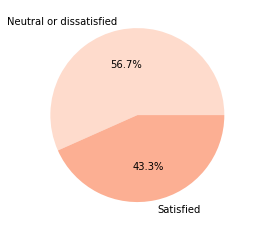

In [ ]:
#Target variable distribution
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Reds"), autopct = '%1.1f%%')
pass

In [ ]:
#The target values are approximately equally distributed.

<Figure size 1440x1080 with 0 Axes>

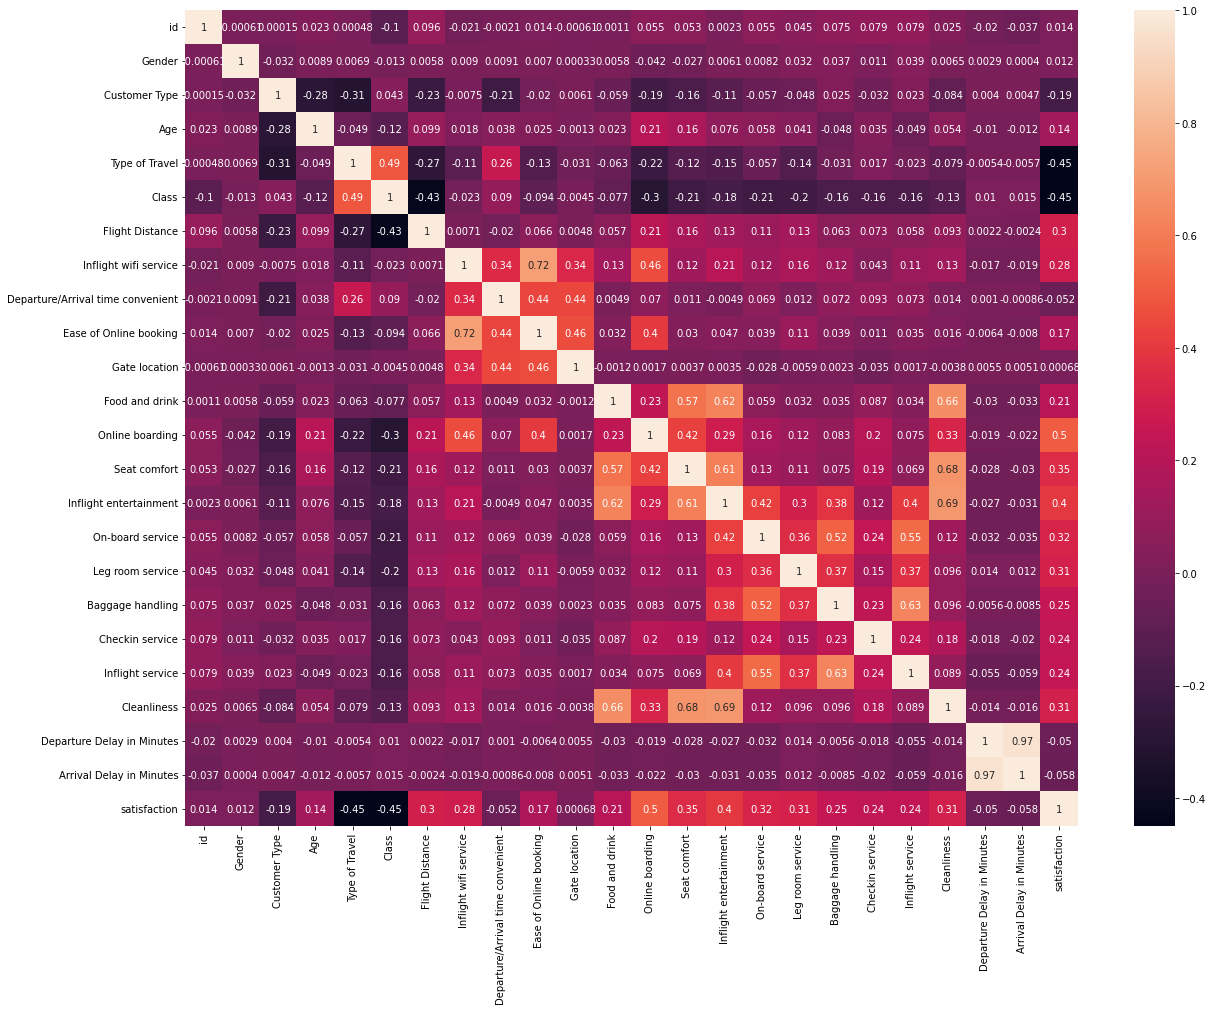

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#There's a multicolinearity between Arrival delay in minutes and Departure Delay in minutes also between inflight entertainment and cleanliness
#Also a coleration between seat comfort , food and drink and the cleanliness

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Age group of Passengers')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Passengers')

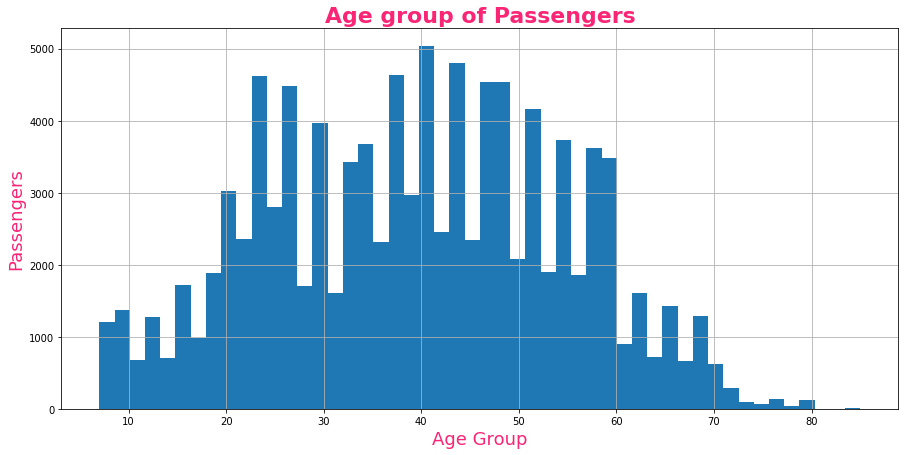

In [ ]:
#Age of Passengers
plt.figure(figsize=(15, 7))

df['Age'].hist(bins=50)

plt.title("Age group of Passengers", weight="bold", size="22", color='#FB2576')
plt.xlabel("Age Group", size="18", color='#FB2576')
plt.ylabel("Passengers", size="18", color='#FB2576')

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Distance Travelled')

Text(0.5, 0, 'Distance (in km)')

Text(0, 0.5, 'No. of Flights')

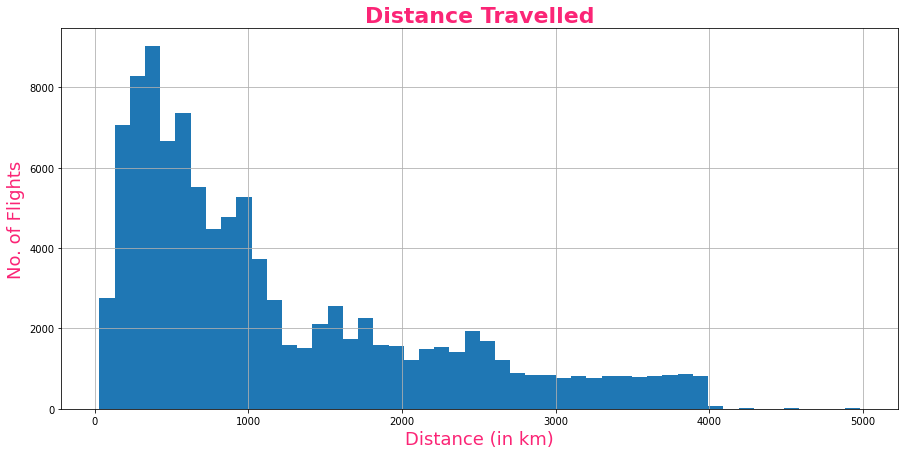

In [ ]:
#Flight Distance
plt.figure(figsize=(15, 7))

df['Flight Distance'].hist(bins=50)

plt.title("Distance Travelled", weight="bold", size="22", color='#FB2576')
plt.xlabel("Distance (in km)", size="18", color='#FB2576')
plt.ylabel("No. of Flights", size="18", color='#FB2576')

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Flight Delay')

Text(0.5, 0, 'Delay Time (in mins)')

Text(0, 0.5, 'Flights')

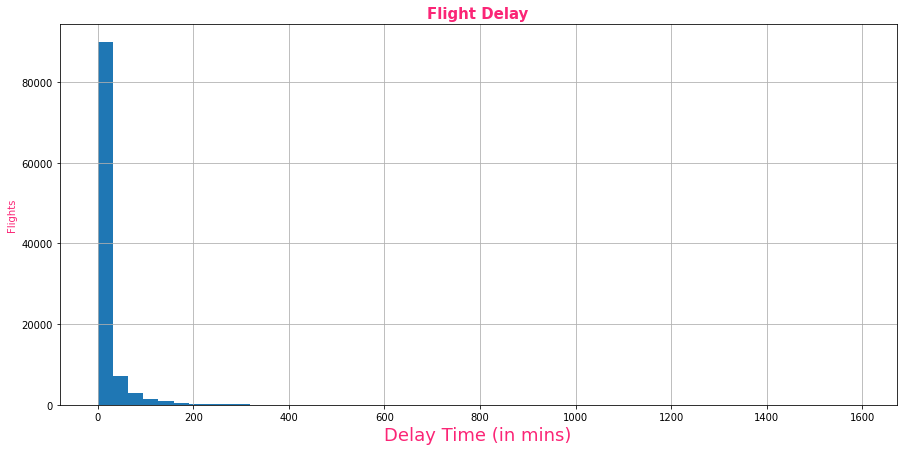

In [ ]:
#Flight Delay
plt.figure(figsize=(15, 7))

df['Departure Delay in Minutes'].hist(bins=50)

plt.title("Flight Delay", weight="bold", size="15", color='#FB2576')
plt.xlabel("Delay Time (in mins)", size="18", color='#FB2576')
plt.ylabel("Flights", size="10", color='#FB2576')

In [ ]:
##From this we can see majority of flights are delayed by around 10-50 minutes.

In [ ]:
df['Ease of Online booking'].value_counts()

3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64

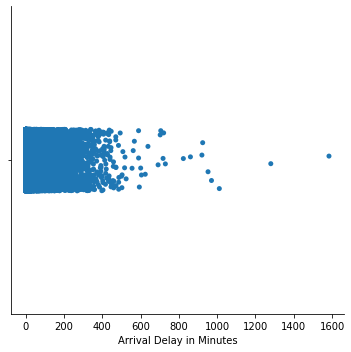

In [ ]:
sns.catplot(data=df, x="Arrival Delay in Minutes")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12aab97fd0>]],
      dtype=object)

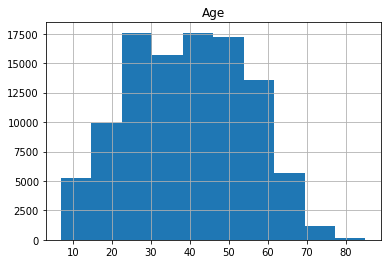

In [ ]:
pd.DataFrame(df.Age).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12aaad6b20>]],
      dtype=object)

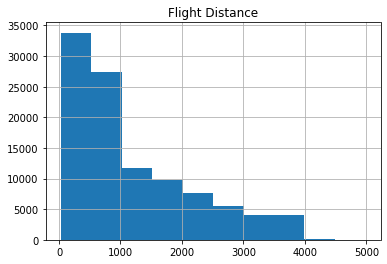

In [ ]:
pd.DataFrame(df['Flight Distance']).hist()

In [ ]:
import seaborn as sns

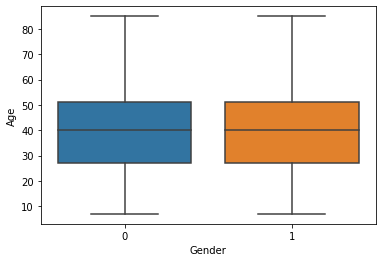

In [ ]:
sns.boxplot(x="Gender",y="Age",data=df)

In [ ]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


#Feature Engineering

In [ ]:
df['Adult'] = df['Age']
df.loc[list(df[df['Age'] < 18].index), ['Adult']] = 0
df.loc[list(df[df['Age'] >= 18].index), ['Adult']] = 1
 

In [ ]:
df['Time'] = df['Flight Distance'] / 20 + df['Arrival Delay in Minutes'] 

In [ ]:
 df['Overtake'] = df['Arrival Delay in Minutes'] - df['Departure Delay in Minutes']

In [ ]:
 df['Adult'].value_counts()

1    95973
0     7931
Name: Adult, dtype: int64

In [ ]:
 df['Time'].value_counts()

16.85     369
22.35     238
19.95     230
20.20     227
29.70     225
         ... 
264.35      1
328.05      1
362.25      1
247.45      1
250.75      1
Name: Time, Length: 5843, dtype: int64

In [ ]:
 df['Overtake'].value_counts()

 0.0      48848
-1.0       3369
-2.0       2824
-3.0       2543
 1.0       2454
          ...  
-44.0         1
 206.0        1
 138.0        1
 135.0        1
 234.0        1
Name: Overtake, Length: 180, dtype: int64

In [ ]:
df['Comfort'] = df['Seat comfort'] * df['Cleanliness'] * df['Food and drink']

In [ ]:
df['Comfort'].value_counts()

64     13869
125    12005
8      11107
27     10582
1       8125
60      4797
80      3999
100     3781
48      3390
75      2818
40      2596
36      2471
12      2433
24      2343
32      2202
16      2065
45      1813
50      1667
30      1663
4       1549
18      1417
9       1253
20      1183
6       1005
3        783
2        711
25       669
15       629
10       440
5        431
0        108
Name: Comfort, dtype: int64

In [ ]:
df['Comfort+'] = df['Seat comfort'] + df['Cleanliness'] + df['Food and drink']

In [ ]:
df['Comfort+'].value_counts()

12    20333
9     15266
15    12005
6     11884
11     8468
3      8128
10     6914
13     6817
8      4088
14     3781
7      3773
5      1690
4       736
2        20
1         1
Name: Comfort+, dtype: int64

In [ ]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Adult,Time,Overtake,Comfort,Comfort+
0,70172,1,0,13,1,2,460,3,4,3,...,5,5,25,18.0,0,0,41.00,-7.0,125,15
1,5047,1,1,25,0,0,235,3,2,3,...,4,1,1,6.0,0,1,17.75,5.0,1,3
2,110028,0,0,26,0,0,1142,2,2,2,...,4,5,0,0.0,1,1,57.10,0.0,125,15
3,24026,0,0,25,0,0,562,2,5,5,...,4,2,11,9.0,0,1,37.10,-2.0,8,6
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,0,0.0,1,1,10.70,0.0,60,12


In [ ]:
df=df.dropna()

In [ ]:
X, y = df.drop(['satisfaction'], axis = 1), df['satisfaction']

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test, fit=True):
    if fit == True:
        model.fit(X_train,y_train)
        
    y_pred = model.predict(X_test)
    
    from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix
    roc_auc = roc_auc_score(y_test, y_pred)

    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits = 5))
    plot_confusion_matrix(model, X_test, y_test,cmap = plt.cm.Blues)
    
    return model, roc_auc

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((93234, 28), (10360, 28))

In [ ]:
y_train.shape, y_test.shape

((93234,), (10360,))

In [ ]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Adult                                0
Time                     

ROC_AUC = 0.8946656539934845
              precision    recall  f1-score   support

           0    0.92959   0.87585   0.90192      5864
           1    0.84943   0.91348   0.88029      4496

    accuracy                        0.89218     10360
   macro avg    0.88951   0.89467   0.89111     10360
weighted avg    0.89480   0.89218   0.89254     10360



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


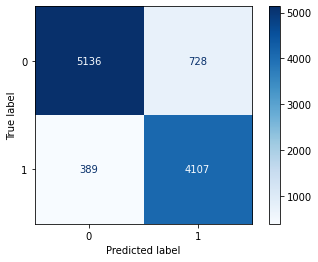

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_df = DecisionTreeClassifier(random_state = 42, max_depth = 3)
model_df, roc_auc_df = run_model(model_df, X_train, y_train, X_test, y_test)

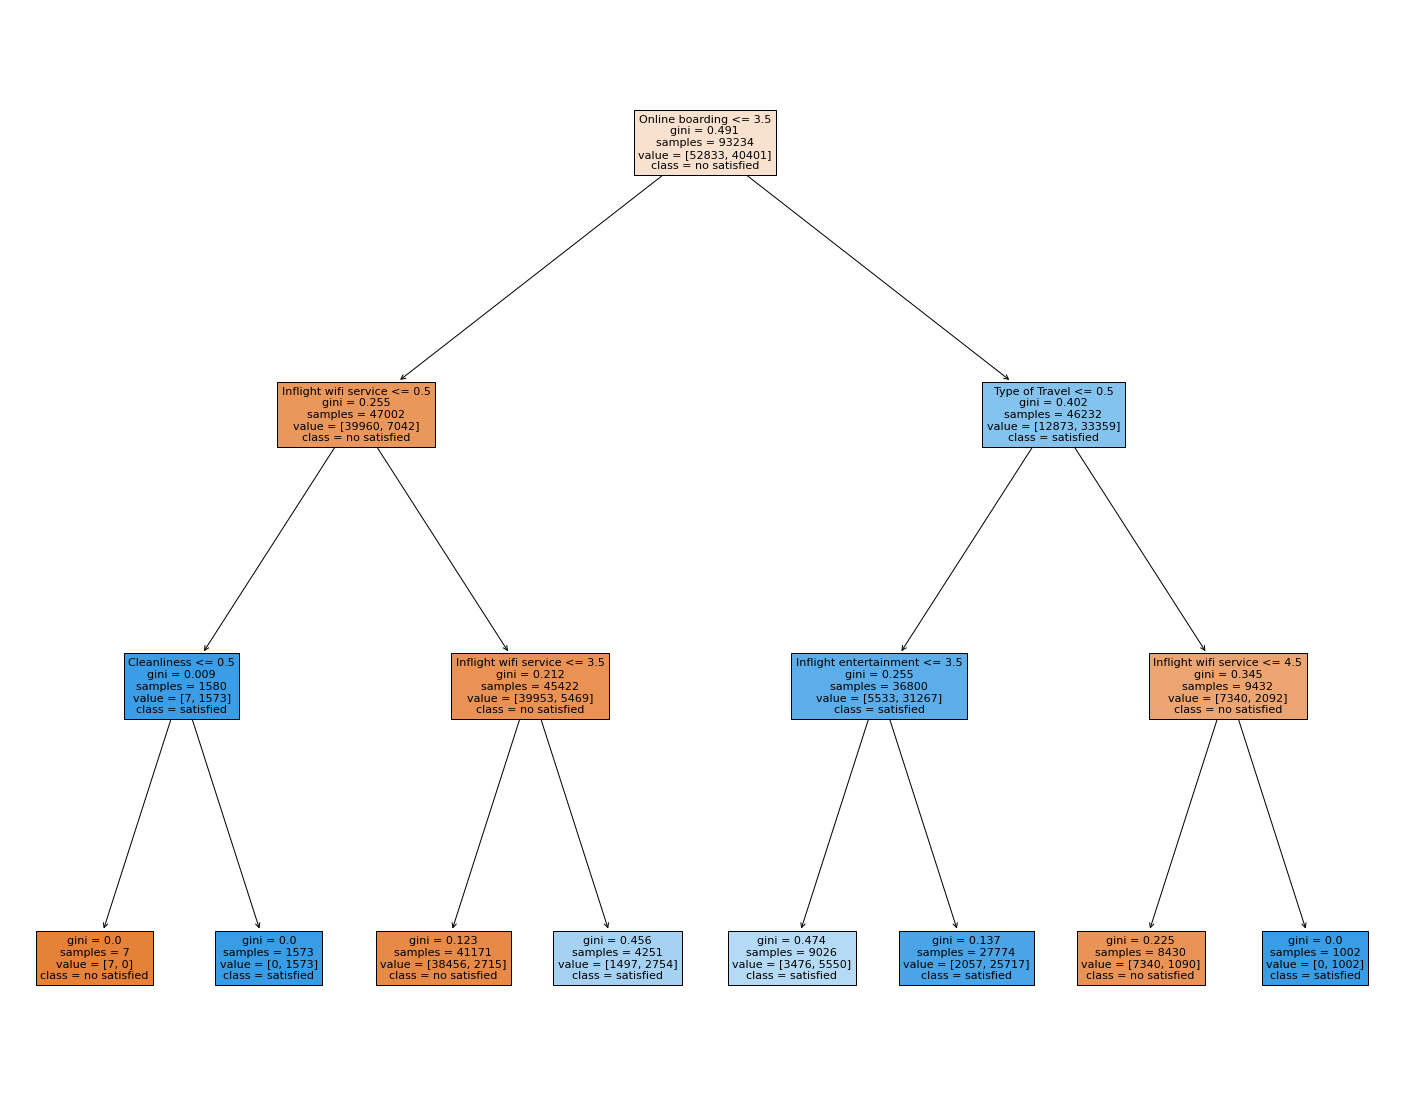

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model_df, 
              feature_names = X_train.columns,
              class_names = ['no satisfied', 'satisfied'],
              filled=True)

ROC_AUC = 0.9469589157316736
              precision    recall  f1-score   support

           0    0.95350   0.95464   0.95407      5864
           1    0.94074   0.93928   0.94001      4496

    accuracy                        0.94797     10360
   macro avg    0.94712   0.94696   0.94704     10360
weighted avg    0.94796   0.94797   0.94797     10360



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


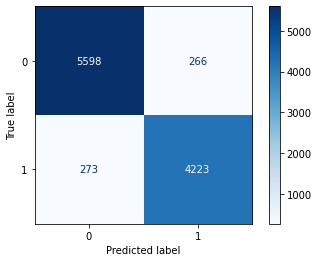

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_df = DecisionTreeClassifier(random_state = 42)
model_df, roc_auc_df = run_model(model_df, X_train, y_train, X_test, y_test)

ROC_AUC = 0.9605162145038428
              precision    recall  f1-score   support

           0    0.95473   0.98175   0.96805      5864
           1    0.97529   0.93928   0.95695      4496

    accuracy                        0.96332     10360
   macro avg    0.96501   0.96052   0.96250     10360
weighted avg    0.96365   0.96332   0.96323     10360



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


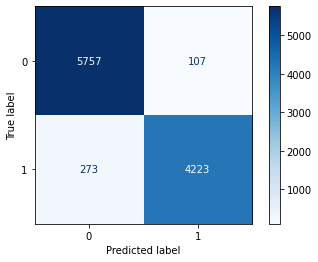

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state = 42)
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [ ]:
#Feature Importance
def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

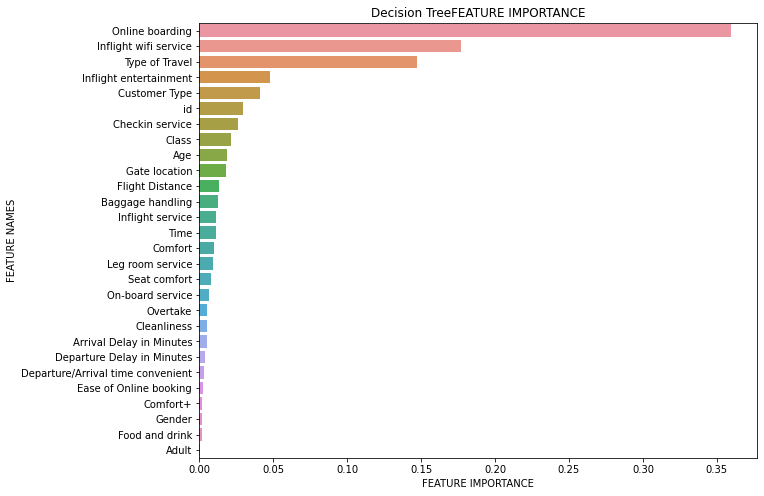

In [ ]:
plot_feature_importance(model_df.feature_importances_, X_train.columns, 'Decision Tree')

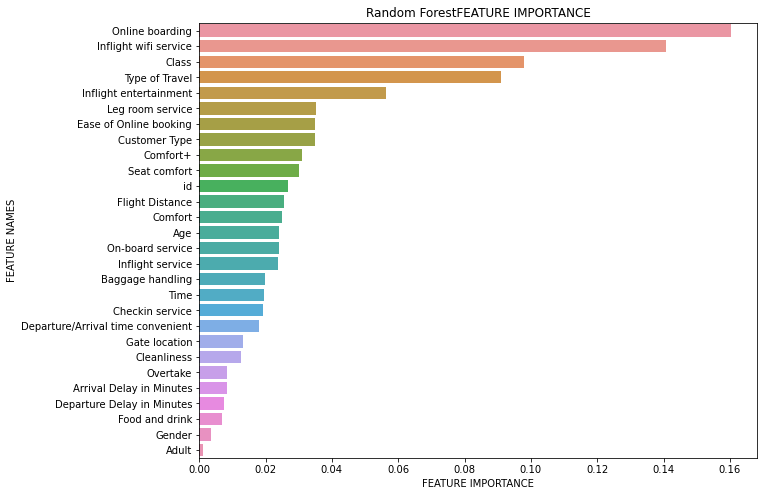

In [ ]:
plot_feature_importance(model_rf.feature_importances_, X_train.columns, 'Random Forest')

In [ ]:
newData = df.drop(['Gender', 'Adult', 'Food and drink', 'Arrival Delay in Minutes', 'Departure Delay in Minutes'], axis = 1)

In [ ]:
X_new, y_new = newData.drop(["satisfaction"], axis = 1), newData['satisfaction']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.1, random_state = 42)

ROC_AUC = 0.9612687403203333
              precision    recall  f1-score   support

           0    0.95568   0.98192   0.96863      5864
           1    0.97555   0.94061   0.95776      4496

    accuracy                        0.96400     10360
   macro avg    0.96562   0.96127   0.96319     10360
weighted avg    0.96430   0.96400   0.96391     10360



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


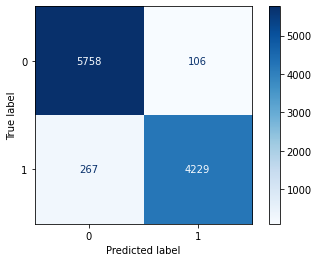

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state = 42)
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

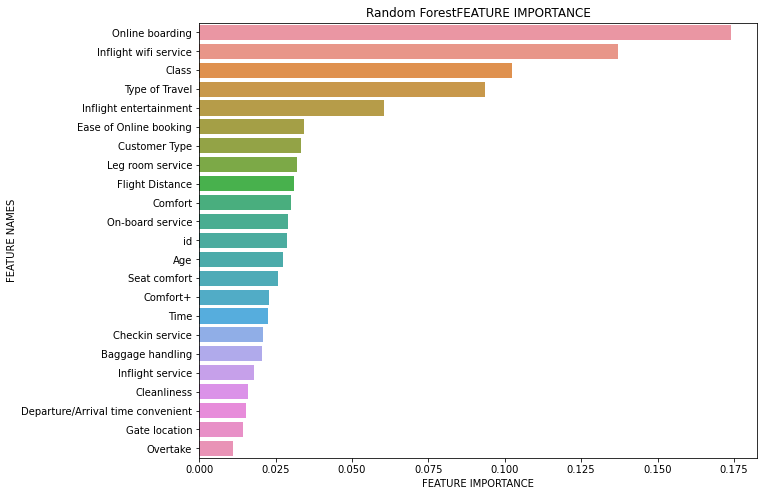

In [ ]:
plot_feature_importance(model_rf.feature_importances_, X_train.columns, 'Random Forest')

#Pipelines

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe = Pipeline([
            ('scaler', StandardScaler()), 
            ('svc', LogisticRegression())
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', LogisticRegression())])

In [ ]:
pipe.score(X_test, y_test)

0.8714285714285714

#Model Building

In [ ]:
data=df.copy()

In [ ]:
y=data['satisfaction']

In [ ]:
X=data.drop('satisfaction', axis=1)

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(
                                                  X,
                                                  y,
                                                  test_size = 0.2
                                                  )
X_train.shape   
X_test.shape 

(82875, 28)

(20719, 28)

In [ ]:
X.shape

(103594, 28)

In [ ]:
xyz=tf.keras.Input(shape=(28,))

In [ ]:
x=tf.keras.layers.Dense(32,activation='relu')(xyz)

In [ ]:
abc=tf.keras.layers.Dense(16,activation='tanh')(x)

In [ ]:
c=tf.keras.layers.concatenate([abc,xyz])

In [ ]:
tt=tf.keras.layers.Dense(2,activation='sigmoid')(c)

In [ ]:
model=tf.keras.Model(inputs=[xyz],outputs=[tt]) 

In [ ]:
model.compile(loss="mean_squared_error",metrics='mean_squared_error')

In [ ]:
history = model.fit(
                    X_train,
                    y_train,
                    validation_split=0.2,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
2072/2072 [==============================] - 12s 5ms/step - loss: 0.4999 - mean_squared_error: 0.4999 - val_loss: 0.4997 - val_mean_squared_error: 0.4997
Epoch 2/50
2072/2072 [==============================] - 9s 4ms/step - loss: 0.4324 - mean_squared_error: 0.4324 - val_loss: 0.4228 - val_mean_squared_error: 0.4228
Epoch 3/50
2072/2072 [==============================] - 5s 2ms/step - loss: 0.4460 - mean_squared_error: 0.4460 - val_loss: 0.4225 - val_mean_squared_error: 0.4225
Epoch 4/50
2072/2072 [==============================] - 5s 2ms/step - loss: 0.4443 - mean_squared_error: 0.4443 - val_loss: 0.4250 - val_mean_squared_error: 0.4250
Epoch 5/50
2072/2072 [==============================] - 5s 2ms/step - loss: 0.4418 - mean_squared_error: 0.4418 - val_loss: 0.4141 - val_mean_squared_error: 0.4141
Epoch 6/50
2072/2072 [==============================] - 5s 2ms/step - loss: 0.4331 - mean_squared_error: 0.4331 - val_loss: 0.4911 - val_mean_squared_error: 0.4911
Epoch 7/50
2072

In [ ]:
model.evaluate(X_test,y_test)

648/648 [==============================] - 1s 2ms/step - loss: 0.4229 - mean_squared_error: 0.4229


[0.4229186475276947, 0.4229186475276947]

In [ ]:
#Print model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 32)           928         ['input_3[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 16)           528         ['dense_3[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 44)           0           ['dense_4[0][0]',                
                                                                  'input_3[0][0]']          